# Capstone Data Project Part I


### Purpose: This is a mutli-class classification problem used to determine the probability of diabetes based on the following criteria: 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'. Project explored 4 models to determine the best accuracy for predicting diagnosis.  

In [6]:
#pip install import-ipynb

In [8]:

#### Run imports:
# standard data science imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# model & metric imports
# Specific imports
# These are new! Notice we're using the 'from' approach to import only what we need.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

# sklearn imports
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Model Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold 

# Create a custom color map.
from matplotlib.colors import ListedColormap

from sklearn import preprocessing

from sklearn.decomposition import PCA


# Statistics imports
from scipy import stats
import statsmodels.api as sm

import csv
import import_ipynb
pd.set_option('display.float_format', lambda x: '%.0f' % x)


import pandas as pd
#change number of columns displayed
pd.set_option('display.max_columns',100)


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(font_scale=1.5);

#from my_Functions import all my functions
#%run my_functions.ipynb  ## create a functions file

In [9]:
import pandas as pd

url = "https://archive.ics.uci.edu/static/public/891/data.csv"
df = pd.read_csv(url)

print(df.head(1))  # Print the first few rows

   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                     0             0       0        1                  0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0              1            0        5        18        15         1    0   

   Age  Education  Income  
0    9          4       3  


In [10]:
df.columns


Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

Imports


In [13]:
#display number of rows and columns
df.shape 


(253680, 23)

In [16]:
#display info
df.describe

<bound method NDFrame.describe of             ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  \
0            0                0       1         1          1   40       1   
1            1                0       0         0          0   25       1   
2            2                0       1         1          1   28       0   
3            3                0       1         0          1   27       0   
4            4                0       1         1          1   24       0   
...        ...              ...     ...       ...        ...  ...     ...   
253675  253675                0       1         1          1   45       0   
253676  253676                1       1         1          1   18       0   
253677  253677                0       0         0          1   28       0   
253678  253678                0       1         0          1   23       0   
253679  253679                1       1         1          1   25       0   

        Stroke  HeartDiseaseorAttack  Phy

In [17]:
df.dtypes

ID                      int64
Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [19]:
#discovering more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   Diabetes_binary       253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  Fruits                253680 non-null  int64
 11  Veggies               253680 non-null  int64
 12  HvyAlcoholConsump     253680 non-null  int64
 13  AnyHealthcare         253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  GenHlth               253680 non-n

In [20]:
#identify missing values -- the data has no missing values
df.isna().sum()

ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [22]:
f = lambda x:x==1

In [23]:
#various ways to view the data
#what is the education level of smokers
df['Smoker_1'] = df['Smoker'].apply(f)

In [33]:
is_Smoker.describe()

count     253680
unique         2
top        False
freq      141257
Name: Smoker, dtype: object

In [32]:
#counter where value is True
is_Smoker = df['Smoker'] == 1

In [44]:
#Obervation
#data includes 141K non-smokers do not have diabetes and 112K smokers do have diabetes

df.groupby(['Smoker', 'Diabetes_binary']).agg(['count' ]).reset_index()

,Smoker,Diabetes_binary,ID,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Smoker_1
,,,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
0,0,0,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228,124228
1,0,1,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029,17029
2,1,0,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106,94106
3,1,1,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317,18317


Smokers have a decreased risk of developing diabetes than a non-smoker 

In [34]:

#

df.groupby(by=['Diabetes_binary'])['Smoker'].agg(['count' ]).reset_index()

,Diabetes_binary,count
0,0,218334
1,1,35346


There are more non-somkers with diabetes than smokers.  I wonder why?

In [37]:
#PhysHlth  DiffWalk  Sex  Age  Education  Income  
#1 Never attended school or only kindergarten  
#2 Grades 1 through 8 (Elementary)   
#3 Grades 9 through 11 (Some high school)   
#4 Grade 12 or GED (High school graduate)   
#5 College 1 year to 3 years (Some college or technical school)   
#6 College 4 years or more (College graduate)   
#9 Refused   
#BLANK Not asked or Missing 1,770

df['Education'].value_counts()

6    107325
5     69910
4     62750
3      9478
2      4043
1       174
Name: Education, dtype: int64

In [43]:
#what are the education levels of people with diabetes?
#Obervation
#data includes 141K non-smokers do not have diabetes and 112K smokers do have diabetes

df.groupby(['Education', 'Diabetes_binary']).agg(['count' ]).reset_index()

,Education,Diabetes_binary,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income,Smoker_1
,,,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
0,1,0,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
1,1,1,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
2,2,0,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860,2860
3,2,1,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183
4,3,0,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182,7182
5,3,1,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296
6,4,0,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684,51684
7,4,1,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066,11066
8,5,0,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556,59556


As the education level increase, so does diabetes count

In [68]:
#create a subset of data
physical_df = df[['Diabetes_binary', 'PhysActivity','Fruits','Veggies' ]]
             

In [62]:
fruits_df = df[['Diabetes_binary', 'Fruits','Veggies']]  
             

In [73]:
heartdis_df = df[['Diabetes_binary','HeartDiseaseorAttack' ,'PhysActivity' ]]

In [74]:
physical_df.groupby(['PhysActivity', 'Diabetes_binary']).agg(['count' ]).reset_index()

 

,PhysActivity,Diabetes_binary,Fruits,Veggies
,,,count,count
0,0,0,48701,48701
1,0,1,13059,13059
2,1,0,169633,169633
3,1,1,22287,22287


individual that eat fruits and veggies with physical activity had less diabetes

In [75]:
heartdis_df.groupby(['HeartDiseaseorAttack', 'Diabetes_binary']).agg(['count' ]).reset_index()

,HeartDiseaseorAttack,Diabetes_binary,PhysActivity
,,,count
0,0,0,202319
1,0,1,27468
2,1,0,16015
3,1,1,7878


Individuals that stay active are less likely to have heart attack or diabetes

### summary statistics

In [80]:
 
def summary_statistics(column, data):
    X = data[column]
    print ('COLUMN: ' + column)
    print ('mean: ' + str(np.mean(X)))
    print ('median: ' + str(np.median(X)))
    print ('mode: ' + str(stats.mode([round(d) for d in X])))
    print ('variance: ' + str(np.var(X)))
    print ('standard deviation: ' + str(np.std(X)))

In [81]:
#Identify a normal distribution within a data set using summary statistics and data visualizations
summary_statistics('Age', df)

COLUMN: Age
mean: 8.032119205298013
median: 8.0
mode: ModeResult(mode=array([9]), count=array([33244]))
variance: 9.328225688720385
standard deviation: 3.05421441433315


Average age is 8 

### Education levels



#1 Never attended school or only kindergarten  
#2 Grades 1 through 8 (Elementary)   
#3 Grades 9 through 11 (Some high school)   
#4 Grade 12 or GED (High school graduate)   
#5 College 1 year to 3 years (Some college or technical school)   
#6 College 4 years or more (College graduate)   
#9 Refused   
#BLANK Not asked or Missing 1,770

In [82]:
#Identify a normal distribution within a data set using summary statistics and data visualizations
summary_statistics('Education', df)



COLUMN: Education
mean: 5.050433617155472
median: 5.0
mode: ModeResult(mode=array([6]), count=array([107325]))
variance: 0.9717468949159729
standard deviation: 0.9857722327779237


Average education is College 1 year to 3 years

In [90]:
df[['Diabetes_binary', 'Education','Age','PhysActivity','Fruits','Veggies' ]].describe()

,Diabetes_binary,Education,Age,PhysActivity,Fruits,Veggies
count,253680,253680,253680,253680,253680,253680
mean,0,5,8,1,1,1
std,0,1,3,0,0,0
min,0,1,1,0,0,0
25%,0,4,6,1,0,1
50%,0,5,8,1,1,1
75%,0,6,10,1,1,1
max,1,6,13,1,1,1


Data may not be accurate.  Show the oldest person in this collectoin is 13 and the average person has 
college 1-3 years experience

# Correlation 

## Identify most prominent features

<AxesSubplot:>

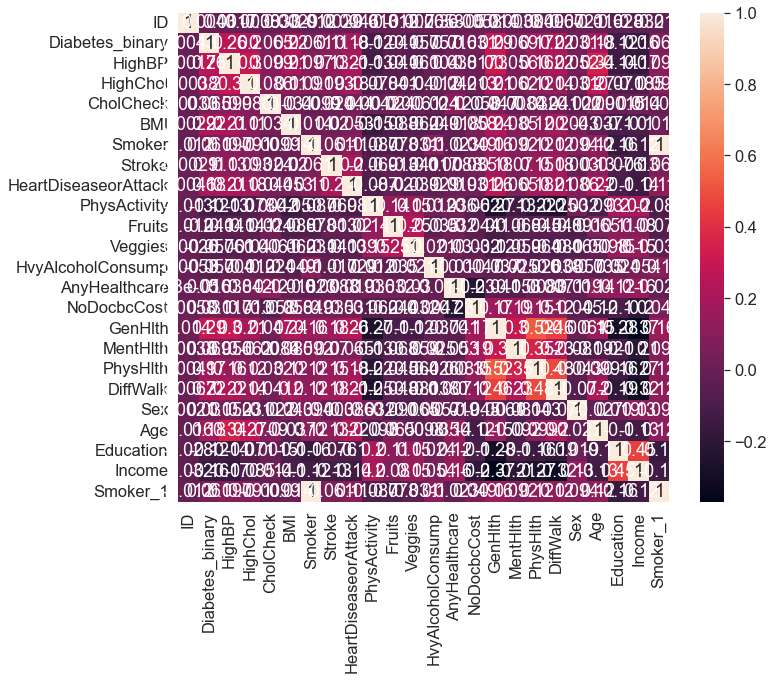

In [91]:

corr = df.corr()
# Heatmap for data correaltion
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, annot=True)
#sns.heatmap(corr)

identified heat around diffwalk, physical health, general health income and eduction.

<AxesSubplot:>

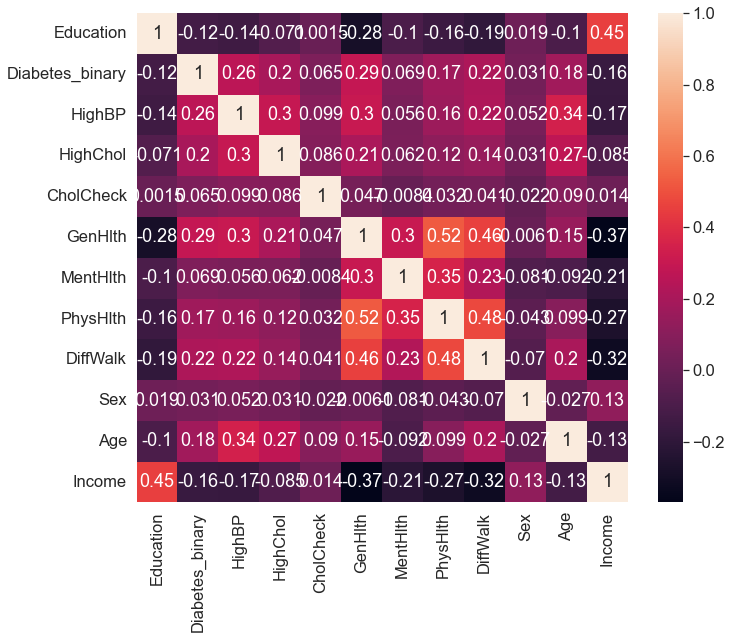

In [97]:
#Take a closer look
corr = df[['Education','Diabetes_binary','HighBP','HighChol','CholCheck','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Income']].corr()
# Heatmap for data correaltion
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, annot=True)
#sns.heatmap(corr)

Top 5 correlated features are centered around mental and phyical health.  I plan to use this features when I build my prediction model
 